In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("iris_11.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


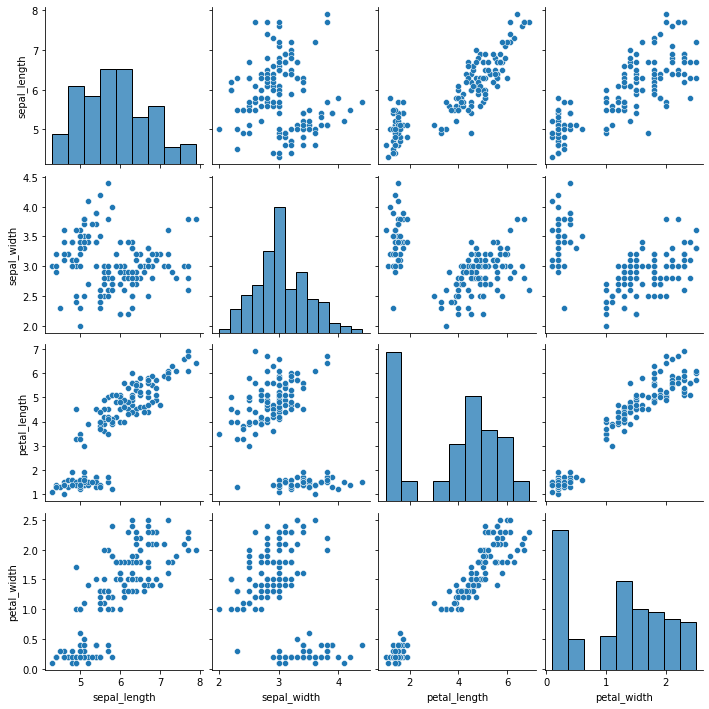

In [6]:
sns.pairplot(df);

## Scaling Data

In [7]:
# CLusterings definitely need scaling but if all of our features same like this data. We don't need to do scale.

In [8]:
df_copy = df.copy()

## Dendogram

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage

**“linkage” parameter: (default= “ward”)**

  {‘ward’, ‘complete’, ‘average’, ‘single’}

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. 
-	Ward minimizes the variance of the clusters being merged.
-	Average uses the average of the distances of each observation of the two sets.
-	Complete or maximum linkage uses the maximum distances between all observations of the two sets.
-	Single uses the minimum of the distances between all observations of the two sets.


In [10]:
hc_ward = linkage (y= df, method ="ward") 
hc_complete = linkage (df, "complete") 
hc_average = linkage (df, "average") 
hc_single= linkage(df ,"single") 

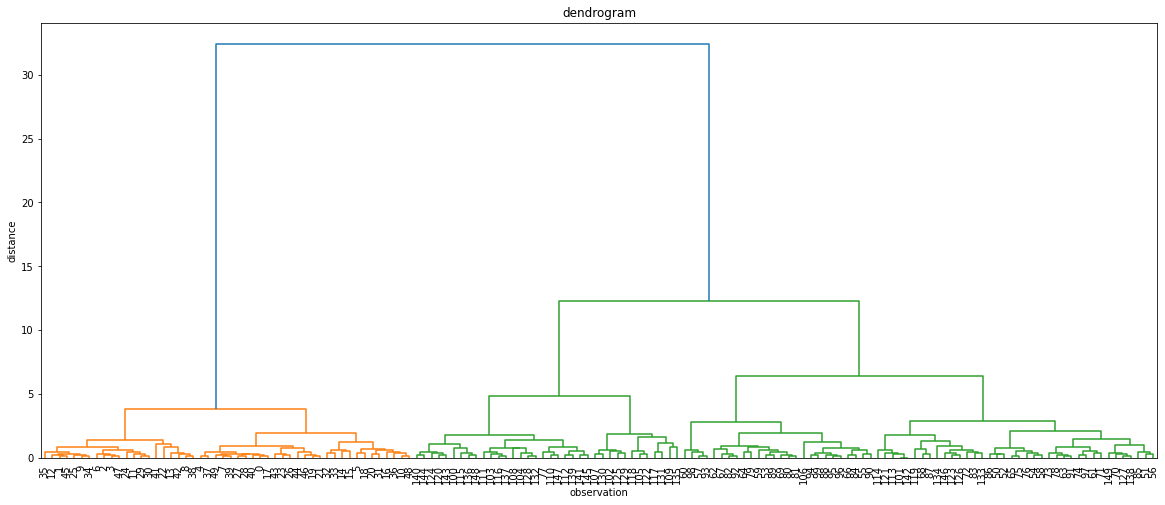

In [11]:
plt.figure(figsize= (20,8))

plt.title("dendrogram")
plt.xlabel("observation")
plt.ylabel("distance")

dendrogram (hc_ward, leaf_font_size=10);

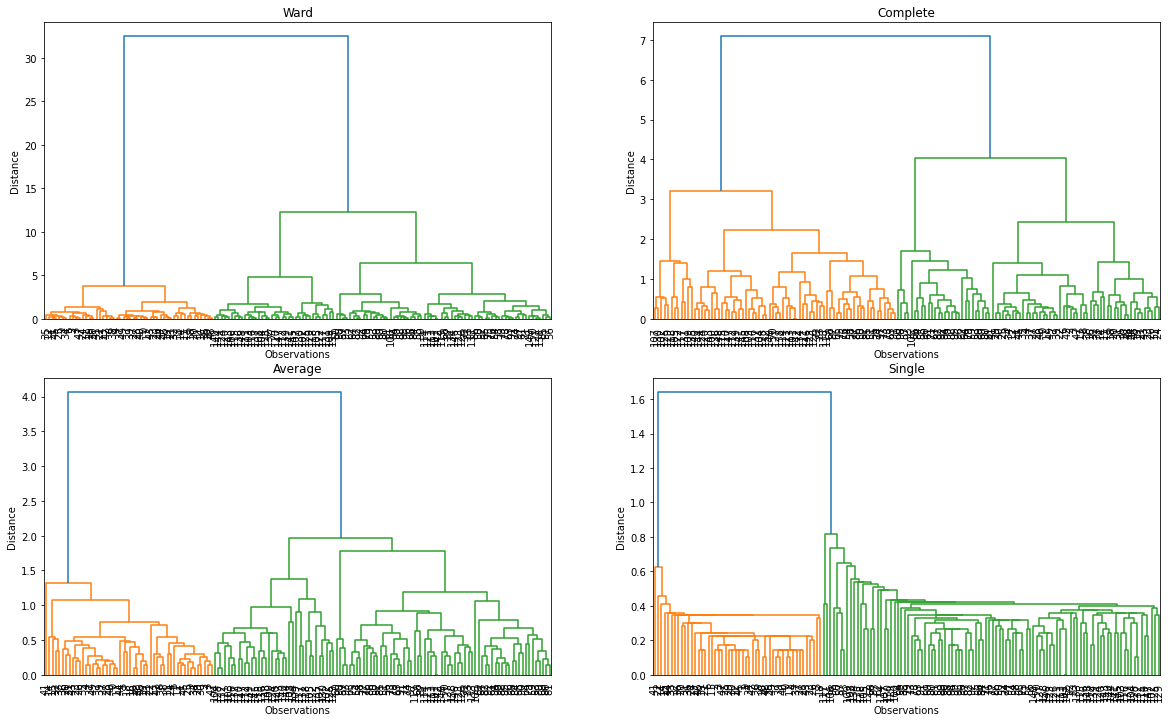

In [12]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

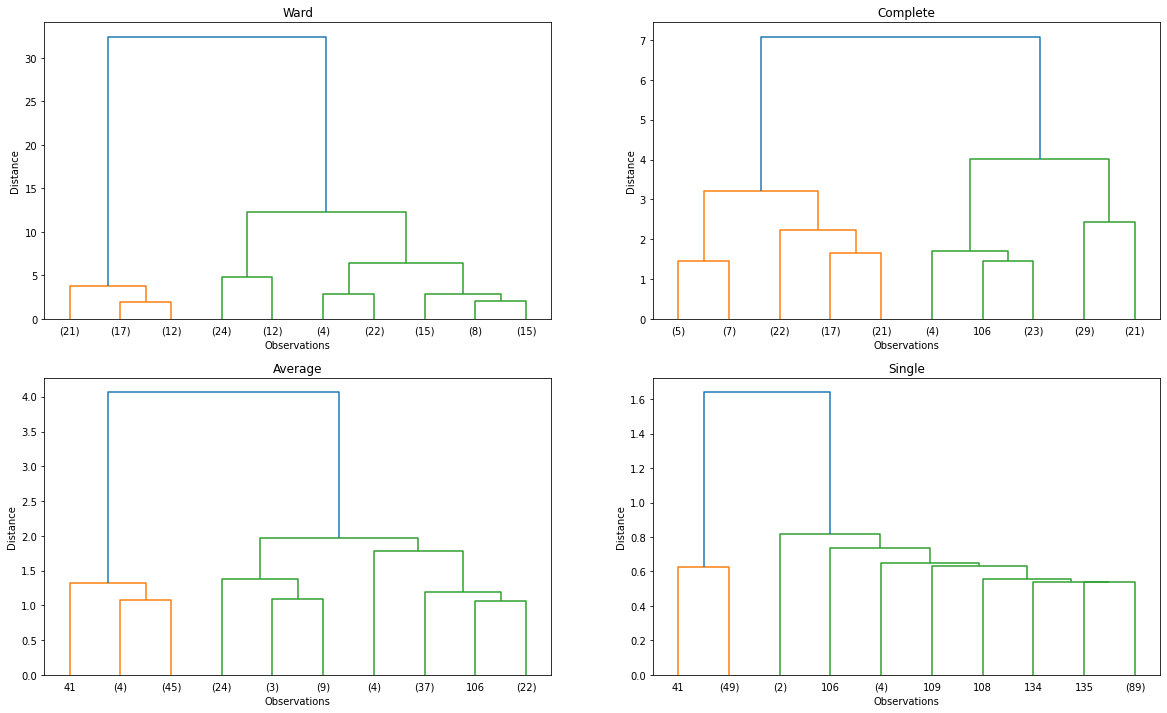

In [13]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp' , p=10);  


# truncate_mode = 'lastp' 
# p max n_cluster

## Hierarchical Clustering (Agglomerative)

In [14]:
from sklearn.cluster import AgglomerativeClustering

### S(Silhouette) Score

In [15]:
from sklearn.metrics import silhouette_score

In [16]:
K = range (2,10)

for k in K:
    model =AgglomerativeClustering(n_clusters = k)
    model.fit_predict(df)
    print("f'Silhouette Score for",{k}, "clusters",{silhouette_score(df, model.labels_)})

f'Silhouette Score for {2} clusters {0.6867350732769781}
f'Silhouette Score for {3} clusters {0.5543236611296426}
f'Silhouette Score for {4} clusters {0.48896708575546993}
f'Silhouette Score for {5} clusters {0.48438258927906036}
f'Silhouette Score for {6} clusters {0.359237619260309}
f'Silhouette Score for {7} clusters {0.34220719366205077}
f'Silhouette Score for {8} clusters {0.3435906599119544}
f'Silhouette Score for {9} clusters {0.3304886352874667}


In [17]:
model1 =  AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage = "ward") # 
model1.fit_predict(df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [18]:
model1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

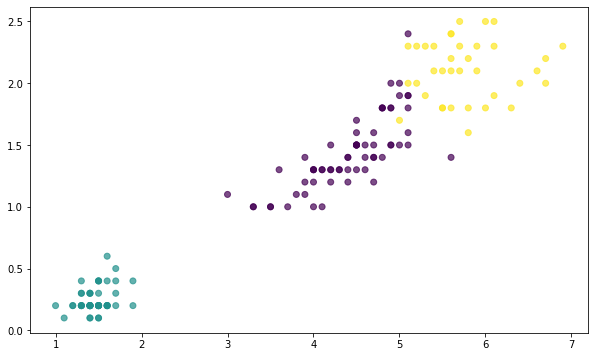

In [19]:
plt.scatter(df["petal_length"], df["petal_width"], c= model1.labels_, cmap= "viridis", alpha = 0.7);

In [20]:
clusters = model1.labels_

In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
df["predicted_clusters"] = clusters
df.head()

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [23]:
odf = pd.read_csv("iris.csv")
labels = pd.DataFrame(odf["species"]) # True labels coming from experts lol
labels

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [24]:
# df["predict_clusters"] = clusters
df["labels"]= labels
df

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters,labels
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,0,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [25]:
ct = pd.crosstab(df["predicted_clusters"], df["labels"])
ct

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,49,15
1,50,0,0
2,0,1,35


## ARI Score

- The Adjusted Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
- The value of ARI indicates no good clustering if it is close to zero or negative, and a good cluster if it is close to 1.

In [26]:
from sklearn.metrics.cluster import rand_score , adjusted_rand_score

In [27]:
rand_score(df['labels'] , df['predicted_clusters'])

0.8797315436241611

In [28]:
adjusted_rand_score(df['labels'] , df['predicted_clusters'])

0.7311985567707746

## Visualization Clusters

In [29]:
# df_labels = df.predicted_clusters.map({0 : "versicolor", 1: "setosa", 2:"virginica"})
# df_labels

In [30]:
df_labels = df.labels.map({"versicolor":0, "setosa":1,"virginica":2})
df_labels

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: labels, Length: 150, dtype: int64

In [31]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters,labels
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa


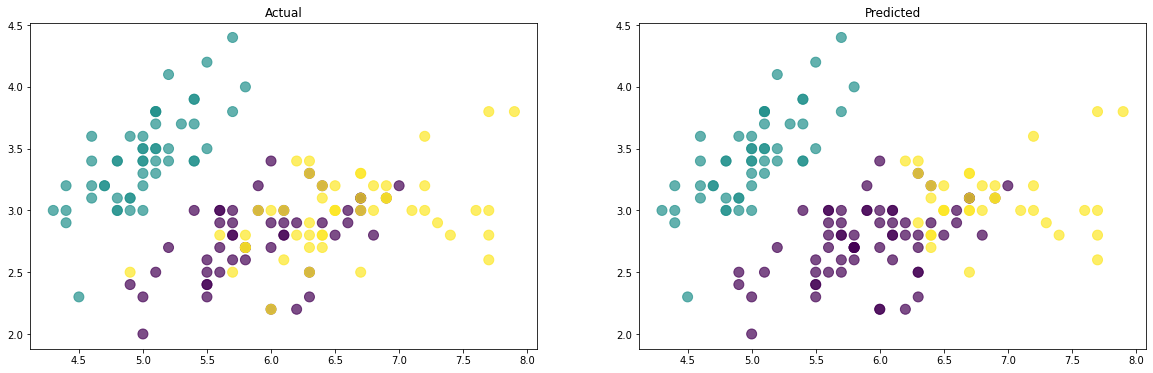

In [32]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(df["sepal_length"], df["sepal_width"], c = df_labels, cmap = "viridis", alpha=0.7, s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(df["sepal_length"], df["sepal_width"], c = df.predicted_clusters, cmap = "viridis", alpha=0.7, s=100)
plt.title("Predicted");

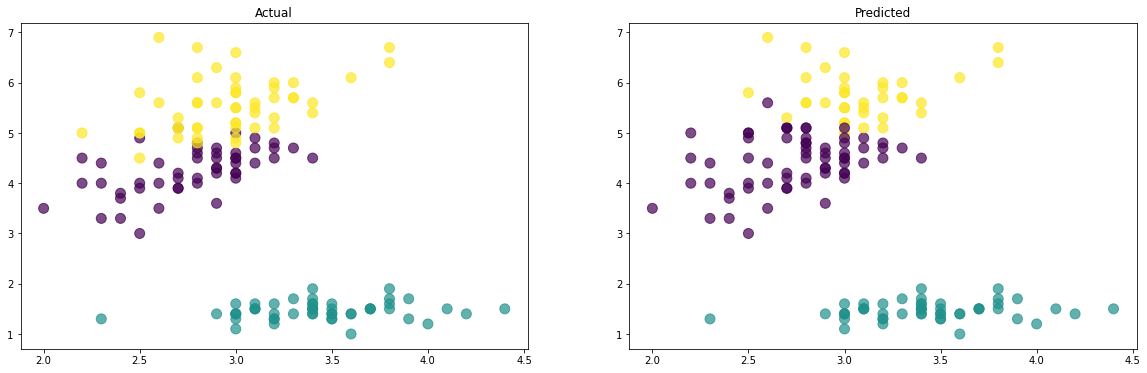

In [33]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(df["sepal_width"], df["petal_length"], c = df_labels, cmap = "viridis", alpha=0.7, s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(df["sepal_width"], df["petal_length"], c = df.predicted_clusters, cmap = "viridis", alpha=0.7, s=100)
plt.title("Predicted");

## Remodeling according to discriminating features

In [34]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters,labels
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa


In [35]:
clus_pred = df.iloc[:, [0, 1, 2, 3, 5]].groupby("labels").mean().T
clus_pred

labels,setosa,versicolor,virginica
sepal_length,5.006,5.936,6.588
sepal_width,3.428,2.770,2.974
petal_length,1.462,4.260,5.552
petal_width,0.246,1.326,2.026


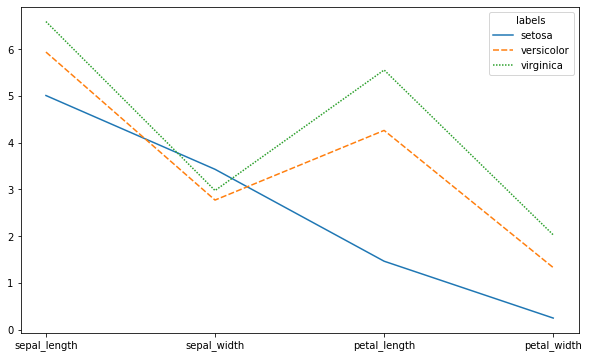

In [36]:
sns.lineplot(data = clus_pred);

<AxesSubplot:xlabel='labels', ylabel='petal_width'>

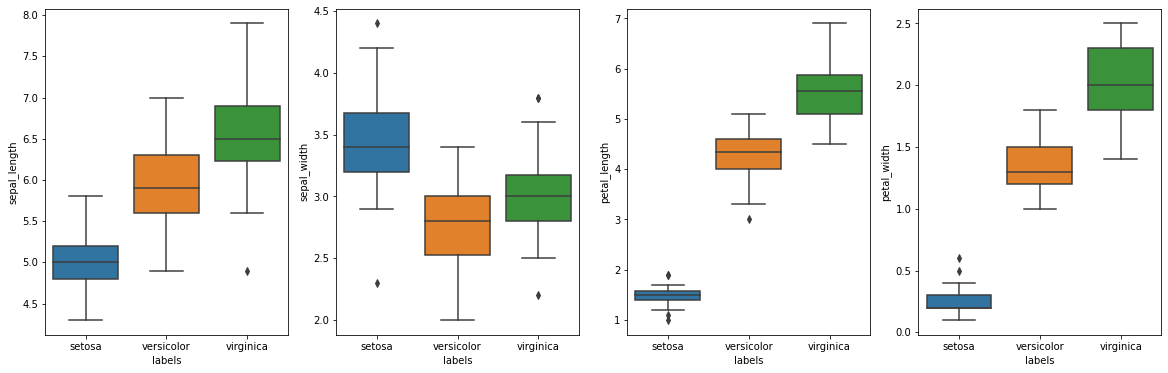

In [37]:
plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "sepal_length", x = "labels", data = df)

plt.subplot(142)
sns.boxplot(y = "sepal_width", x = "labels", data = df)

plt.subplot(143)
sns.boxplot(y = "petal_length", x = "labels", data = df)

plt.subplot(144)
sns.boxplot(y = "petal_width", x = "labels", data = df)

In [38]:
df_new = df.iloc[:, [2,3]]
df_new

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


### Dendrogram

In [39]:
hc_ward = linkage(y = df_new, method = "ward")
hc_complete = linkage(df_new, "complete")
hc_average = linkage(df_new, "average")
hc_single = linkage(df_new, "single")

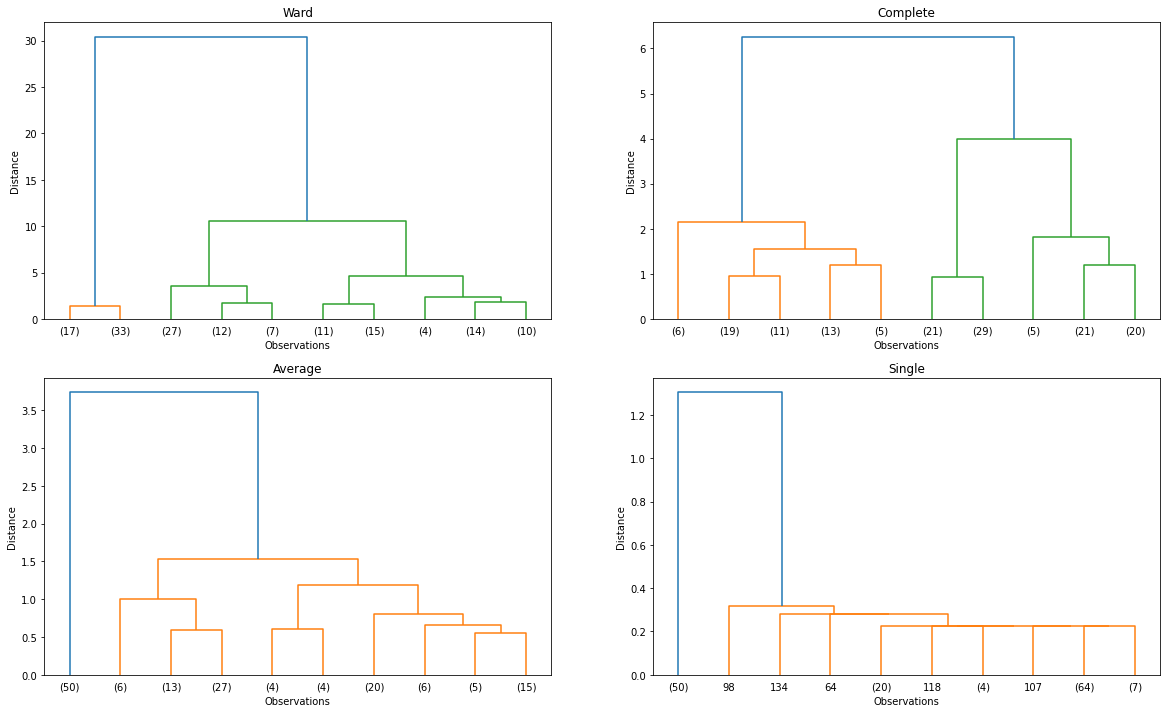

In [40]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

### S(Silhouette) Score

In [41]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(df_new)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df_new, model.labels_)}')

Silhouette Score for 2 clusters: 0.7669465622770762
Silhouette Score for 3 clusters: 0.6573949269287823
Silhouette Score for 4 clusters: 0.5895284480910935
Silhouette Score for 5 clusters: 0.5781917218437669
Silhouette Score for 6 clusters: 0.5747380906148477
Silhouette Score for 7 clusters: 0.5830818097709548
Silhouette Score for 8 clusters: 0.5678904784921739
Silhouette Score for 9 clusters: 0.5469910001848306


## Final model

In [42]:
final_model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "complete")
clusters = final_model.fit_predict(df_new)

In [43]:
df_new["predicted_clusters"] = clusters
df_new["labels"] = labels
df_new

C:\Users\EmincanY\AppData\Local\Temp\ipykernel_20260\4142695639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["predicted_clusters"] = clusters
C:\Users\EmincanY\AppData\Local\Temp\ipykernel_20260\4142695639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["labels"] = labels


,petal_length,petal_width,predicted_clusters,labels
0,1.4,0.2,2,setosa
1,1.4,0.2,2,setosa
2,1.3,0.2,2,setosa
3,1.5,0.2,2,setosa
4,1.4,0.2,2,setosa
...,...,...,...,...
145,5.2,2.3,0,virginica
146,5.0,1.9,0,virginica
147,5.2,2.0,0,virginica
148,5.4,2.3,0,virginica


In [44]:
df_new_ct = pd.crosstab(df_new["predicted_clusters"], df_new["labels"]) # clusters with only 2 features
df_new_ct

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,5,49
1,0,45,1
2,50,0,0


In [45]:
ct # Before clusters with 4 features.

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,49,15
1,50,0,0
2,0,1,35


In [46]:
df_new_labels = df_new.labels.map({"versicolor":0, "setosa":1,"virginica":2})
df_new_labels

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: labels, Length: 150, dtype: int64

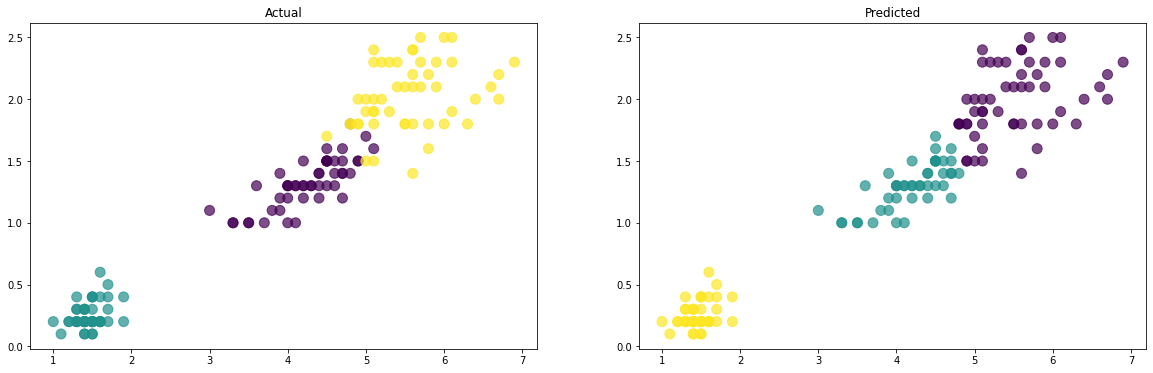

In [47]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(df_new["petal_length"], df_new["petal_width"], c = df_new_labels, cmap = "viridis", alpha=0.7, s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(df_new["petal_length"], df_new["petal_width"], c = df_new.predicted_clusters, cmap = "viridis", alpha=0.7, s=100)
plt.title("Predicted");

### ARI Score

In [48]:
print(rand_score(df_new.labels, df_new.predicted_clusters))
adjusted_rand_score(df_new.labels, df_new.predicted_clusters)

0.9495302013422818


0.8857921001989628

## Prediction cluster of new data

In [66]:
df_final = df_copy.iloc[:,[2,3]]
df_final

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [68]:
new_data = [[1.7, 0.2], [2.3, 0.5]]

In [69]:
new_data = pd.DataFrame({'petal_length' : [new_data[0][0],new_data[1][0]] , 'petal_width' : [new_data[0][1],new_data[1][1]]} , index = range(2)) # I'll find more easy way.

In [73]:
df_last = pd.concat([df_final , new_data] , axis = 0)
df_last.reset_index(drop=True)

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
147,5.2,2.0
148,5.4,2.3
149,5.1,1.8
150,1.7,0.2


In [ ]:
# Now need to predict again.

In [ ]:
# Done for now.